### Student details

Student name: Cathaoir Agnew

Student ID: 16171659

# Task 1: Perceptrons

* Weight/height Data obtained from https://github.com/johnmyleswhite/ML_for_Hackers

In [1]:
# import dependencies
import numpy as np

### Perceptron class
From: https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

**Note:** The predict function returns either 1 or -1 as labels for the data. Therefore, the training data must match these labels.

In [2]:
class Perceptron(object):

    def __init__(self, eta=0.01, epochs=50 , tol = 0.001 , n_runs = 20):
        # tol is the tolerance for the error. If error is below this tolerance, there will be an early exit 
        self.eta = eta
        self.epochs = epochs
        self.tol = tol
        self.n_runs = n_runs

    def train(self, X, y):

        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        run_count = 0
        previous_error = 0
        
        for _ in range(self.epochs):
            errors = 0    
            for xi, target in zip(X, y):

                update = self.eta * (target - self.predict(xi))
                self.w_[1:] +=  update * xi
                self.w_[0] +=  update
                errors += int(update != 0.0)
            
            # if the absolute value in the change of the errors is less than the convergence tolerance, 
            # the run counter will increase 
            # once run count hits the allowed consecutive runs, ie = n_rums 
            # the function will exit
            if abs(errors - previous_error) < self.tol : 
                run_count += 1
            
            # this allows for a reset if tolerance is broken 
            else:
                run_count = 0
             
            # run count = 0 is not considered, as this is not within the tolerance 
            # > is used to ensure there is n_runs consecutive runs
            if run_count > self.n_runs:
                print("Early exit: ", self.n_runs , " consecutive runs reached within tolerance.")
                break
            
            #print("Errors:" , errors , "Prev error:", previous_error ,"diff:", (errors - previous_error) , "Run count:", run_count , "Tolerance:" , self.tol)
            
            self.errors_.append(errors)
            previous_error = errors

        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

### Read the data 
(provided - should be completed in previous E-tivity)

In [12]:
import pandas

# Read the data from the .csv, using the first row as the headers of the data
data = pandas.read_csv('01_heights_weights_genders.csv',header=0)

X = data.iloc[:,1:3].values # X is the features in our dataset
y = data.iloc[:,0].values
# y is the Labels in our dataset, converted to integers
# Note the conversion to 1 and -1, to match the perceptron class
y = np.where(y == "Female", 1, -1)

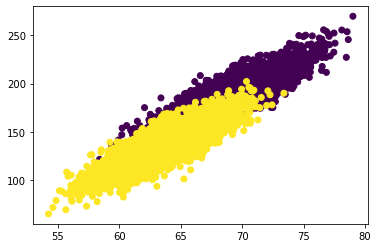

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1],c=y);

### Train/Test Split 
(provided - should be completed in previous E-tivity)

In [5]:
# divide the dataset in train test using scikit learn
# now the model will train in training dataset and then we will use test dataset to predict its accuracy

from sklearn.model_selection import train_test_split

# set random_state to a fixed number, so while the outcome is random, it is repeatible (same result each time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) 

### Train the algorithm (Task)

In [6]:
# intialize perception classifier and then fit data to it 

ppn = Perceptron(tol=50 , n_runs = 5)
ppn.train(X_train , y_train)

Early exit:  5  consecutive runs reached within tolerance.


### Calculate the accuarcy score using the test data and sklearn.metrics (Task)

In [7]:
# Predicting the X test & calculating accuracy score
y_preds = ppn.predict(X_test)

from sklearn.metrics import accuracy_score

# Printing out the accuracy score on the X test 
print("Perception accuracy (in %):", accuracy_score(y_test , y_preds)*100)


Perception accuracy (in %): 85.63636363636363


### Visualisations (Task)
1. Visualise the errors at each training epoch. Hint, the errors for each epoch are stored in the errors class variable
2. Using many random inputs (e.g. 5000) plot to see if you can see the decision boundary. In this case, you will not be using the pandas dataframe, so it is probably better to use matplotlib

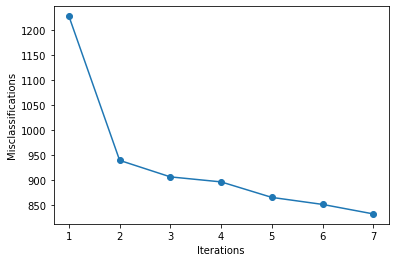

In [8]:
# plotting errors 

# this code is available from the reading we had as part of the this etivity, link below
# https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html)

plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Misclassifications')
plt.show()

## Below puts predicitions into a dataframe
Just so I can use pink/ blue custom colours

In [9]:
# creating 5000 new random samples
import random 
import pandas as pd 

new_sample_height = []
new_sample_weight = []

for i in range(5000):
    # these values used below were just taken from ciarans example of his plot 
    new_sample_height.append(random.uniform(55,80))
    new_sample_weight.append(random.uniform(75,250))
    
rand_sample = pd.DataFrame(list(zip(new_sample_height,new_sample_weight)) , columns = ["Height", "Weight"]  )

new_preds = ppn.predict(rand_sample)

# adding the predicitons to the dataframe so can plot the predictions 
rand_sample['Predictions'] = new_preds

print(rand_sample.head())

      Height      Weight  Predictions
0  66.020129  188.317195           -1
1  66.672942  130.346587            1
2  65.011840  168.648767           -1
3  77.831260  129.969876            1
4  75.237709  124.485849            1


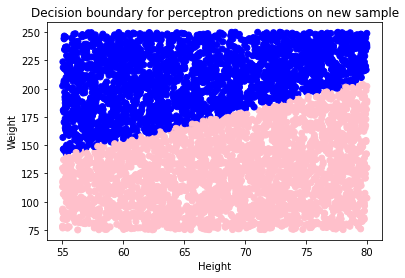

In [10]:
import matplotlib.pyplot as plt

#male = -1 and female = 1 from new ordering 

colors = {-1:'blue', 1:'pink'}

plt.scatter(rand_sample.Height, rand_sample.Weight , c = rand_sample.Predictions.map(colors))

plt.title('Decision boundary for perceptron predictions on new sample')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

## Below only uses lists

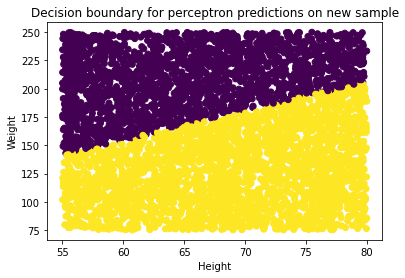

In [11]:
# creating 5000 new random samples
import random 
import pandas as pd 

new_sample_height_1 = []
new_sample_weight_1 = []

for i in range(5000):
    # these values used below were just taken from ciarans example of his plot 
    new_sample_height_1.append(random.uniform(55,80))
    new_sample_weight_1.append(random.uniform(75,250))
    
rand_sample_1 = list(zip(new_sample_height_1,new_sample_weight_1)) 

predictions = ppn.predict(rand_sample_1)

plt.scatter(new_sample_height_1, new_sample_weight_1 , c= predictions )
plt.title('Decision boundary for perceptron predictions on new sample')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

### Then, discuss the following in Markdown cells:
1.	Describe what is happening as the training progresses? 
2.	Do we arrive at the very best solution at the last epoch, or is there an epoch with a lower error? Why is that?
3.	Why can’t we get zero error with this data?


## Q1.
The misclassifications are improving at each iteration. For every epoch/iteration the perceptron weights are going to be updated. If predicted value is equal to expected value, then no changes are made in the perceptron weight, as target - output = 0, as predicited correctly. However if predicted value is not equal to expected value then the perceptron weights are updated, since target - ouput != 0. <br> 

**Forumla for updating weights:** <br>

 Δwj=  η (target(i)−output(i)) x(i)j <br>

w = weights  <br>
η = learning rate/ step <br> 
target = predicted value <br>
output = true value <br>
x= training sample


As the perception weights are updating after each epoch/iteration depending if there was a misclassification, we will start to get a better model & better perceptron weights as iterations increase. At each iteration the weights are potenially being updated to better learn how to classify correctly.

## Q2.
No we dont arrive at the best solution at the last epoch, there a multiple better values in previous epoch/iterations. This could be due to the learning rate/step, η , being slightly to big, causing the gradient descent to never fully converge, along with my question 3 answer. The perceptron classifier is linear but the data for genders has an overlap.  Convergence of the perceptron is only guaranteed if the two classes are linearly separable. 

## Q3.
Perceptron is a linear classifier, as this data has quite a substancial overlap across genders for weight & height, refer back to scatterplots, we could never seperate these values with a linear classifier and achieve 100% accuracy score. Convergence of the perceptron is only guaranteed if the two classes are linearly separable.